<a href="https://colab.research.google.com/github/arielle00/CMPE257-Fall23-Arielle-Shnayder/blob/main/Class_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [3]:
import random

## Generates N random points for logistic regression on a line w
def generate_lr(N=20,w0=0,w1=1):
    n = 0
    X1 = []
    Y = []
    while(n < N):
        x1 = random.uniform(-10,10)
        x2 = random.uniform(-1,1)
        y = w0 + w1*x1 + x2
        X1.append(x1)
        Y.append(y)
        n += 1
    data = [np.array([1,X1[i],Y[i]]) for i in range(N)]
    return data

In [4]:
f_w0, f_w1 = 1, 1
N = 50
data = generate_lr(N, f_w0, f_w1)

In [5]:
def abline(slope, intercept, color='b'):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', label = "x_2="+str(slope)+"x_1+"+str(intercept), c=color )

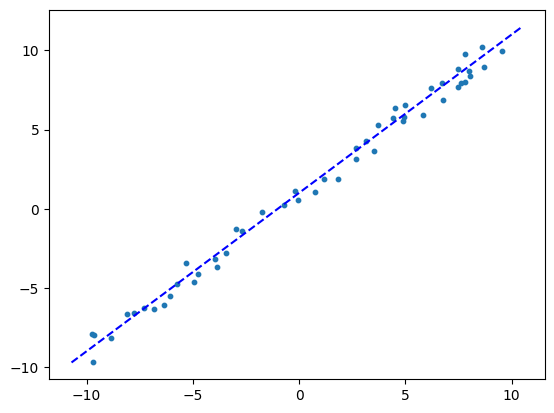

In [6]:
X1 = [i[1] for i in data]
Y  = [i[2] for i in data]
markers = [] #'o' or '+'
colors = [] # 'b' or 'r'
cnt = 0
plt.scatter(X1,Y, s = 10)

abline(f_w1,f_w0)
plt.show()

In [7]:
print(data)
X = [[i[0], i[1]] for i in data]
Y  = [i[2] for i in data]

[array([1.        , 7.64214376, 7.95872578]), array([1.        , 8.06696641, 8.40842008]), array([1.        , 6.70943663, 7.9218062 ]), array([1.        , 1.16433072, 1.88150978]), array([ 1.        , -3.96847747, -3.16626689]), array([ 1.       , -6.0723755, -5.4800613]), array([ 1.        , -5.75243742, -4.758288  ]), array([1.        , 4.90690165, 5.56109385]), array([ 1.        ,  8.61142814, 10.20555178]), array([ 1.        , -1.72316908, -0.22886362]), array([1.        , 7.98069546, 8.69499132]), array([1.        , 4.92029974, 5.79621031]), array([1.        , 5.83745283, 5.90027818]), array([ 1.        , -2.6616091 , -1.40145071]), array([1.        , 2.66631306, 3.15108704]), array([ 1.        , -7.76850297, -6.55258233]), array([ 1.        , -0.17826931,  1.10560658]), array([1.        , 0.76953376, 1.08672737]), array([ 1.        , -3.41686289, -2.7824201 ]), array([ 1.        , -4.92788686, -4.64558196]), array([1.        , 3.52967822, 3.63790028]), array([ 1.        , -5.3118

In [8]:
XtX = np.matmul(np.transpose(X), X)
XtX.shape

(2, 2)

In [9]:
XtX_inv = np.linalg.inv(XtX)
XtX_inv.shape
XtX_inv

array([[ 0.02018935, -0.00032328],
       [-0.00032328,  0.00055195]])

In [10]:
X_pi = np.matmul(XtX_inv, np.transpose(X))
X_pi

array([[ 0.0177188 ,  0.01758146,  0.01802032,  0.01981294,  0.02147227,
         0.02215242,  0.02204899,  0.01860304,  0.01740545,  0.02074641,
         0.01760935,  0.01859871,  0.01830222,  0.02104979,  0.01932738,
         0.02270075,  0.02024698,  0.01994057,  0.02129395,  0.02178243,
         0.01904827,  0.02190656,  0.02172762,  0.02041608,  0.01776402,
         0.01857712,  0.02239793,  0.01872963,  0.01766677,  0.02224122,
         0.01818338,  0.01916544,  0.01799555,  0.02333903,  0.01959558,
         0.02020327,  0.02304328,  0.01776671,  0.02331818,  0.01737549,
         0.02331639,  0.01710322,  0.02115372,  0.02144419,  0.01766095,
         0.0189856 ,  0.01876764,  0.01932754,  0.0228107 ,  0.02255469],
       [ 0.00389482,  0.0041293 ,  0.00338001,  0.00031937, -0.00251369,
        -0.00367494, -0.00349835,  0.00238509,  0.00442981, -0.00127439,
         0.00408168,  0.00239249,  0.00289871, -0.00179236,  0.0011484 ,
        -0.00461112, -0.00042168,  0.00010147, -0.

In [11]:
w = np.matmul(X_pi, Y)
w

array([0.88400042, 0.98880892])

Plot the final hypothesis with the target and the data points

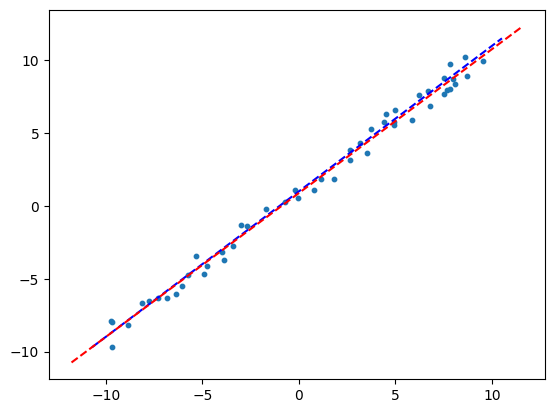

In [12]:
X1 = [i[1] for i in data]
Y  = [i[2] for i in data]
plt.scatter(X1,Y, s = 10)

abline(f_w1,f_w0)
abline(w[1],w[0], color='r')
plt.show()

In [13]:
Y_pred = np.matmul(X, w)
np.sum(np.square(Y_pred-Y))

16.58613071889613

In [14]:
w_other = [3, 2]
Y_other = np.matmul(X, w_other)
np.sum(np.square(Y_other-Y))

2235.848804542973

What about the test data set?

In [15]:
#50 test samples
testdata = generate_lr(50, f_w0, f_w1)
X_test = [[i[0], i[1]] for i in testdata]
Y_test  = [i[2] for i in testdata]
Y_pred_test = np.matmul(X_test, w)
np.sum(np.square(Y_pred_test-Y_test))

16.34263166680983

In [16]:
Y_pred_test_target = np.matmul(X_test, [1, 1])
np.sum(np.square(Y_pred_test_target-Y_test))

15.03473986907001

[0.88400042 0.98880892]


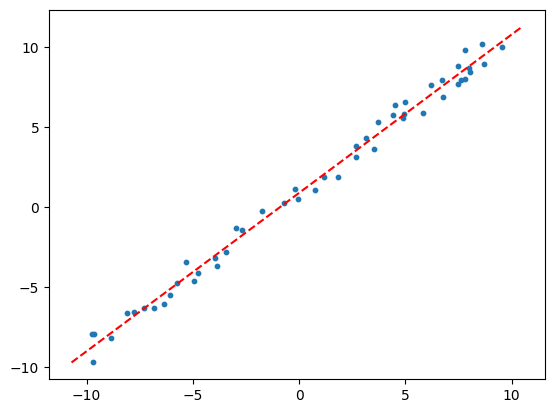

In [17]:
#Regularization
# w_reg = (x^T*x + lambda*I)^-1 * X^T * y
def lr(X, y, lbda):
  XtX = np.matmul(np.transpose(X), X)
  lambda_identity = lbda * np.identity(2)
  w = np.matmul(np.linalg.inv(XtX + lambda_identity) , (np.matmul(np.transpose(X),y)))
  #XtX_inv = np.linalg.inv(XtX)
  #X_pi = np.matmul(XtX_inv, np.transpose(X))
  #w = np.matmul(X_pi, Y)
  print(w)
  return w

w = lr(X, Y, 0)

plt.scatter(X1,Y, s = 10)
# print(w[1], w[0])
# abline(f_w1,f_w0)
abline(w[1],w[0], color='r')
plt.show()

[0.88398289 0.98880866]


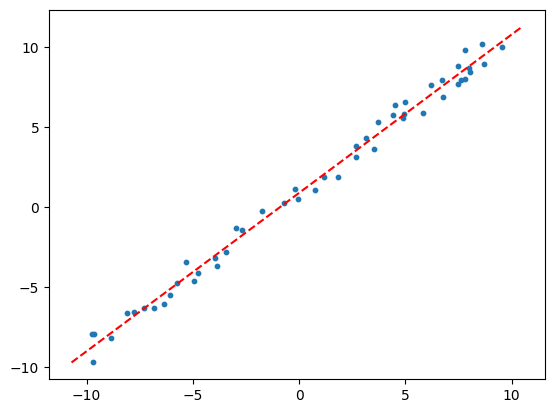

In [18]:
w = lr(X, Y, 0.001)
plt.scatter(X1,Y, s = 10)
# print(w[1], w[0])
# abline(f_w1,f_w0)
abline(w[1],w[0], color='r')
plt.show()

[0.88225118 0.98878286]


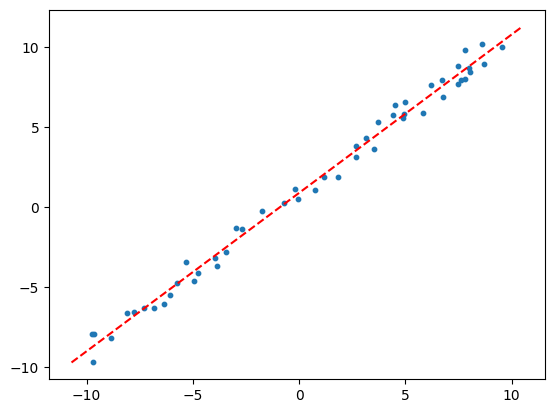

In [19]:
w = lr(X, Y, 0.1)
plt.scatter(X1,Y, s = 10)
# print(w[1], w[0])
# abline(f_w1,f_w0)
abline(w[1],w[0], color='r')
plt.show()

[0.86681948 0.98854351]


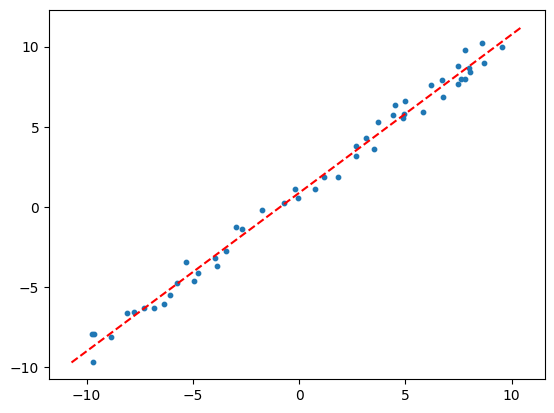

In [20]:
w = lr(X, Y, 1)
plt.scatter(X1,Y, s = 10)
# print(w[1], w[0])
# abline(f_w1,f_w0)
abline(w[1],w[0], color='r')
plt.show()

In [51]:
from numpy.lib.function_base import average

lb = [0, 0.001, 0.1, 1]
kf = KFold(n_splits=5, shuffle=True, random_state=None)

mse_scores = {}

_X = np.array(X)
_Y = np.array(Y)

for lb in lb:
  mse_scores[lb] = []
  for train_index, val_index in kf.split(X):
      X_train, X_val = _X[train_index], _X[val_index]
      Y_train, Y_val = _Y[train_index], _Y[val_index]

      w = lr(X_train, Y_train, lb)
      Y_pred = np.dot(X_val, w)
      score = mean_squared_error(Y_val, Y_pred)
      mse_scores[lb].append(score)

  mse_scores[lb] = average(mse_scores[lb])

print(mse_scores)
print("_________________________________________________________________________________________")
min_key = min(mse_scores, key=mse_scores.get)
min_value = mse_scores[min_key]
print("Best model min key(lambda) =",min_key,"Best model min value(error score) =",min_value )

[0.88785422 0.98381541]
[0.97794966 0.98847668]
[0.88523169 0.9955636 ]
[0.86282215 0.99346059]
[0.81028176 0.98286781]
[0.91155778 0.98388396]
[0.85891381 0.99183397]
[0.96262641 0.98701578]
[0.82380189 1.00840515]
[0.84222671 0.97704295]
[0.90009366 0.98691723]
[0.88470753 0.99169323]
[0.92143787 0.9771157 ]
[0.83272985 0.98580104]
[0.87461475 1.00285268]
[0.85259606 0.99571963]
[0.8165491  0.98759841]
[0.9089101  0.99147987]
[0.85302586 0.97828448]
[0.8763748  0.99050176]
{0: 0.3674205703071558, 0.001: 0.3872045275759901, 0.1: 0.36223155225912335, 1: 0.3522937174916506}
_________________________________________________________________________________________
Best model min key(lambda) = 1 Best model min value(error score) = 0.3522937174916506
